# Übung 6.2 - Naive-Bayes (Gaussian) am Beispiel Lilienbestimmung
Machine Learning, WS2020/21, Moritz von Unold, Richard Lux, Felix Soest

#### In diesem Notebook wird das Verfahren Naive-Bayes anhand des Datensatzes Lilienbestimmung geübt.

### Prozessschritte Data-Mining:

![Bild konnte nicht geladen werden! 1. Daten erfassen - 2. Daten erkunden - 3. Daten vorbereiten - 4. Modelle bilden - 5. Modelle validieren - 6. Modell testen](Prozess_Modellentwicklung_v2.png "Title")

### 0. Bibliohteken importieren

In [1]:
# Importiere benötigte Bibliotheken

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 1. Daten erfassen - Daten importieren

In [2]:
# Erstelle Seed für eigene Zufallszahlen
my_seed = TODO

# Lade Datensatz
df = pd.read_excel("Daten_Schwertlilien.xlsx")

### 2.1 Daten erkunden - Ausgabe Datensatz

In [ ]:
TODO

### 2.2 Daten erkunden - Datensatz spaltenweise beschreiben

In [ ]:
TODO

### 2.3 Daten erkunden - Datensatz visualisieren

In [ ]:
TODO

### 3.1 Daten vorbereiten - Aufteilung in Trainings- und Testdaten sowie X und y

In [3]:
# Aufteilen in Trainings- und Testdaten
from sklearn.model_selection import train_test_split

train_size = TODO  # Wert zwische 0 und 1, Anteil an Trainingsdaten
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["Lilienart"]),
    df["Lilienart"],
    test_size=1 - train_size,
    random_state=my_seed,
)

### 3.2 Daten vorbereiten - Normierung der Daten [optional]

Für eine Normierung der Daten müssen die Kommentar-Zeichen (#) in der 8. und 9. Code-Zeile entfernt werden.

In [4]:
# Normierung der X-Datensätze
from sklearn.preprocessing import StandardScaler

# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  # StandardScaler() or MaxAbsScaler() or MinMaxScaler()
X_train_nor = pd.DataFrame(scaler.fit_transform(X_train.values), index=X_train.index, columns=X_train.columns)
X_test_nor = pd.DataFrame(scaler.transform(X_test.values), index=X_test.index, columns=X_test.columns)

### 4.1 Modelle bilden - Modell importieren und Hyperparameter anzeigen

In [5]:
# Importieren des benötigten Modells
from sklearn.naive_bayes import GaussianNB

# Ausgabe möglicher Hyperparameter
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

### 4.2 Modelle bilden - Erstelle "leeres" Modell ohne Hyperparameter

In [6]:
# Erstelle Modell
clf = GaussianNB()

### 4.3 Modelle bilden - Modell trainieren

In [7]:
# Trainiere das Modell
clf = clf.fit(TODO)

### 4.4 Modelle bilden - Training bewerten

In [8]:
# Ausgabe Genauigkeit auf Trainingsdaten
clf.score(TODO)

0.95

### 5.1 Modelle validieren - Modell validieren
Entfällt da nur 1 Modell trainiert wurde.

### 6.1 Modell testen - Genauigkeit auf Testdaten

In [9]:
# Ausgabe Genauigkeit auf Testdaten
clf.score(TODO)

1.0

### 6.2 Modell testen - Visualisierung der Modellgüte (Konfusionsmatrix)

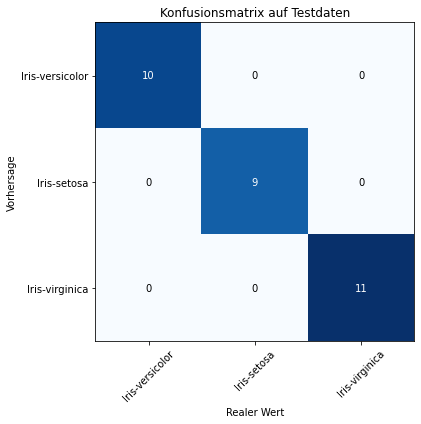

In [10]:
# Ausgabe Konfusionsmatrix
y_now = TODO
X_now = TODO
model_now = clf

# Importieren der Funktion: Confusion matrix
from sklearn.metrics import confusion_matrix

# Erzeuge Matrix
y_pred = model_now.predict(X_now)
cm = confusion_matrix(y_test, y_pred)
labels = y_test.unique()
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Konfusionsmatrix auf Testdaten")
plt.ylabel("Vorhersage")
plt.xlabel("Realer Wert")
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.margins(0, 0)
fmt = "d"
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            ha="center",
            va="center",
            color="white" if cm[i, j] > thresh else "black",
        )
plt.tight_layout()
plt.show()

### Verständnisfragen:

1. Welche Vorteile weißt der Naive-Bayes-Klassifikator gegenüber z.B. Entscheidungsbäumen auf?
2. Welche Nachteile weißt der Naive-Bayes-Klassifikator gegenüber z.B. Entscheidungsbäumen auf?
3. Wieso wird beim Trainieren eines Naive-Bayes-Klassifikators keine Gittersuche verwendet?